In [39]:
# importing the module
import pandas as pd

# importing the dataset
data = pd.read_csv("K-MeanData.csv")

In [40]:
# shape of the dataset
print(data.shape)

(7050, 16)


In [41]:
# previewing the dataset
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [42]:
# printing the missing values
print(data.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [43]:
# droping the columns with missing values
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

# checking null values
print(data.isnull().sum())

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [44]:
# getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [45]:
# labels in the variable
unique_data = data['status_id'].unique()

# printing total uniques values
print (len(unique_data))


6997


In [46]:
# droping the status id variable from data set
data.drop(['status_id'], axis=1, inplace=True)


In [47]:
# labels in the variable
unique_data = data['status_published'].unique()

# printing total uniques values
print (len(unique_data))

6913


In [48]:
# droping the status publisehd variable from data set
data.drop(['status_published'], axis=1, inplace=True)


In [49]:
# labels in the variable
unique_data = data['status_type'].unique()

# printing total uniques values
print (len(unique_data))

4


In [50]:
# info about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [51]:
# feature vector
X = data

# target variable
y = data['status_type']

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# converting the non-numeric to numeric values
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [52]:
# printing the dataset
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [53]:
import seaborn as sns

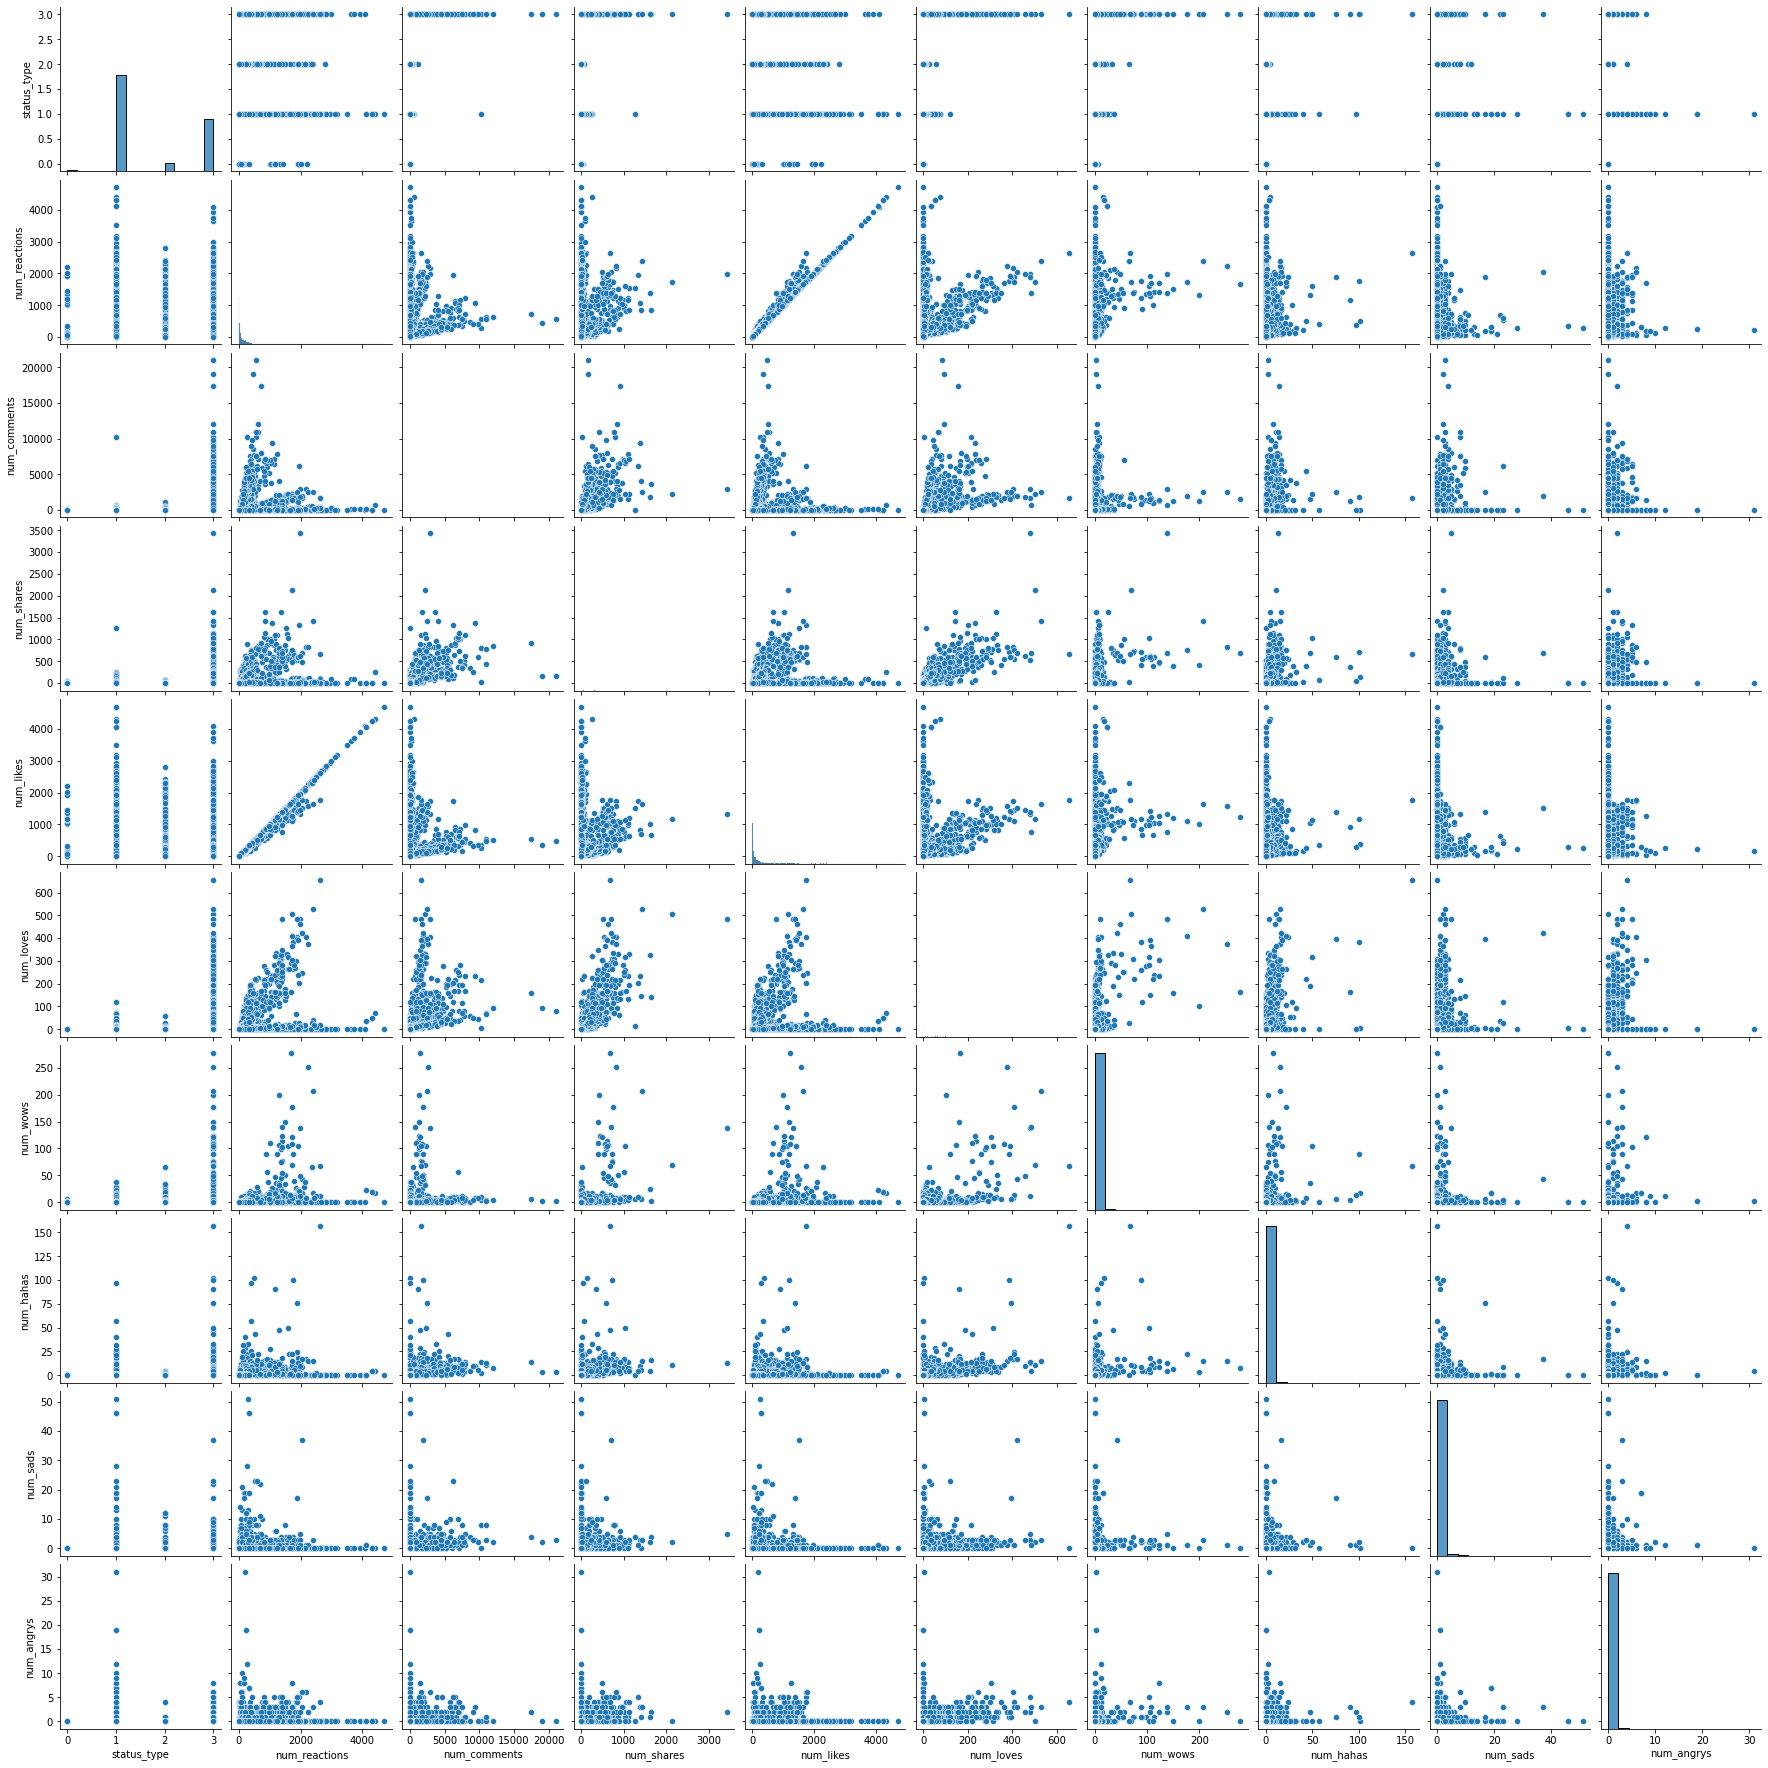

In [18]:
# ploting the pairplot graph
sns.pairplot(data)

In [54]:
# importing k-mean
from sklearn.cluster import KMeans

# k value assigned to 2
kmeans = KMeans(n_clusters=2, random_state=0) 

# fitting the values
kmeans.fit(X)

# Cluster centers
kmeans.cluster_centers_

array([[1.67882472e+00, 2.24142278e+02, 1.22109857e+02, 3.08061948e+01,
        2.11227529e+02, 1.09083804e+01, 1.15298886e+00, 5.56809958e-01,
        1.97423650e-01, 9.63960052e-02],
       [2.98581560e+00, 5.22886525e+02, 5.23441844e+03, 4.91624113e+02,
        4.02007092e+02, 1.01921986e+02, 7.97163121e+00, 7.53900709e+00,
        2.51063830e+00, 9.36170213e-01]])

In [55]:
# printing the value of inertia
print (kmeans.inertia_)

4986397875.914608


In [56]:
# stroing labels
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 64 out of 7050 samples were correctly labeled.


In [57]:
# importing k-mean
from sklearn.cluster import KMeans

# k value assigned to 2
kmeans = KMeans(n_clusters=5, random_state=0) 

# fitting the values
kmeans.fit(X)

# Cluster centers
kmeans.cluster_centers_

# printing the value of inertia
print (kmeans.inertia_)

1469929375.1750844


In [58]:
# stroing labels
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 233 out of 7050 samples were correctly labeled.


/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


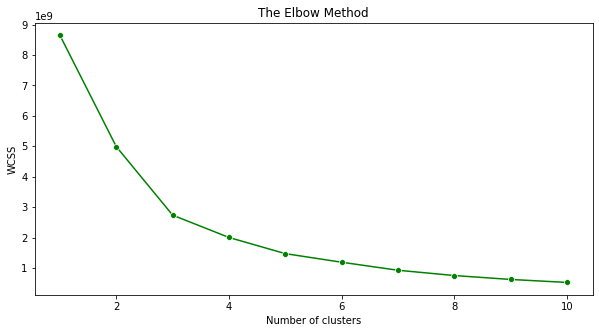

In [59]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

# to store WCSS
wcss = []

# for loop 
for i in range(1, 11):
    
#     k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# importing the matplotlib module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/uca/.local

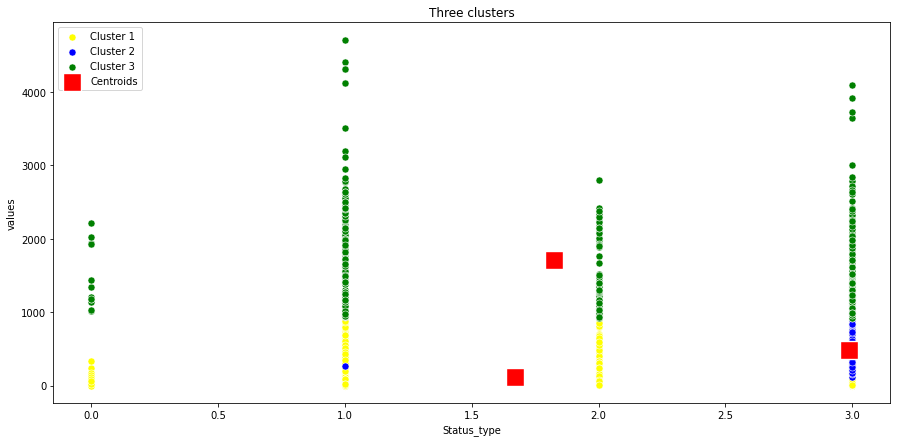

In [60]:
import numpy as np
# k-mean algorithm
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = np.array(X) 
# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('Status_type')
plt.ylabel('values')
plt.legend()
plt.show()